<a href="https://colab.research.google.com/github/LezendarySandwich/CSL7550-Stock-Price-Prediction/blob/master/ARIMA_RELIANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt 

if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datetime import date

STORAGE = '/content/drive/MyDrive' #@param {type : "string"}
KAGGLE_DIR = 'Kaggle' #@param {type : "string"}
KAGGLE_JSON_PATH = os.path.join(STORAGE, KAGGLE_DIR)
QUANDL_PATH = os.path.join(KAGGLE_JSON_PATH, '.quandl')
__PROJECT = os.path.join(STORAGE, 'Neo')
ML_DATASET = os.path.join(__PROJECT, 'dataset')
START_DATE = date(2014, 1, 1)
END_DATE = date(2019,1,1)
STOCK = 'RELIANCE'#@param {type : "string"}
SAVE_DIR = os.path.join(ML_DATASET, f'{STOCK}_{START_DATE}_{END_DATE}')
TEST_DS = os.path.join(SAVE_DIR,'dataset_test.csv')
TRAIN_DS = os.path.join(SAVE_DIR,'dataset_train.csv')

In [ ]:
train_df= pd.read_csv(TRAIN_DS,index_col='Date')
test_df= pd.read_csv(TEST_DS,index_col='Date')
train_df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,897.45,898.25,887.60,888.80,1337074.0
2014-01-02,887.70,896.00,870.10,875.00,1376901.0
2014-01-03,871.60,873.35,855.00,864.25,2933613.0
2014-01-06,862.10,863.25,850.00,854.95,3043781.0
2014-01-07,854.60,859.95,840.05,842.10,3957111.0
...,...,...,...,...,...
2017-12-22,914.65,922.40,909.30,920.40,4872675.0
2017-12-26,924.85,938.90,918.15,929.80,5301456.0
2017-12-27,933.00,937.50,919.00,923.75,4352384.0


In [ ]:
df= pd.concat((train_df[['Open','High','Low','Close','Volume']],test_df[['Open','High','Low','Close','Volume']]),axis=0)
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,897.45,898.25,887.60,888.80,1337074.0
2014-01-02,887.70,896.00,870.10,875.00,1376901.0
2014-01-03,871.60,873.35,855.00,864.25,2933613.0
2014-01-06,862.10,863.25,850.00,854.95,3043781.0
2014-01-07,854.60,859.95,840.05,842.10,3957111.0
...,...,...,...,...,...
2018-12-26,1085.80,1100.00,1065.65,1098.35,7210059.0
2018-12-27,1107.20,1127.00,1104.00,1120.20,12478000.0
2018-12-28,1125.50,1135.25,1121.20,1125.55,7666016.0


In [ ]:
if(STOCK=='TCS'): #TCS stock split
 df=df[:1085]
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,897.45,898.25,887.60,888.80,1337074.0
2014-01-02,887.70,896.00,870.10,875.00,1376901.0
2014-01-03,871.60,873.35,855.00,864.25,2933613.0
2014-01-06,862.10,863.25,850.00,854.95,3043781.0
2014-01-07,854.60,859.95,840.05,842.10,3957111.0
...,...,...,...,...,...
2018-12-26,1085.80,1100.00,1065.65,1098.35,7210059.0
2018-12-27,1107.20,1127.00,1104.00,1120.20,12478000.0
2018-12-28,1125.50,1135.25,1121.20,1125.55,7666016.0


In [ ]:
pd.set_option("display.max_rows", 100)
if STOCK=='RELIANCE':
  df=df[:850]
print(df)

               Open     High      Low    Close     Volume
Date                                                     
2014-01-01   897.45   898.25   887.60   888.80  1337074.0
2014-01-02   887.70   896.00   870.10   875.00  1376901.0
2014-01-03   871.60   873.35   855.00   864.25  2933613.0
2014-01-06   862.10   863.25   850.00   854.95  3043781.0
2014-01-07   854.60   859.95   840.05   842.10  3957111.0
...             ...      ...      ...      ...        ...
2017-06-07  1311.20  1342.00  1309.00  1339.00  2559954.0
2017-06-08  1340.00  1344.80  1328.05  1331.70  1806521.0
2017-06-09  1345.10  1352.95  1331.00  1335.70  3162802.0
2017-06-12  1326.55  1329.75  1317.00  1319.45  1927513.0
2017-06-13  1320.60  1327.00  1311.00  1314.35  1377291.0

[850 rows x 5 columns]


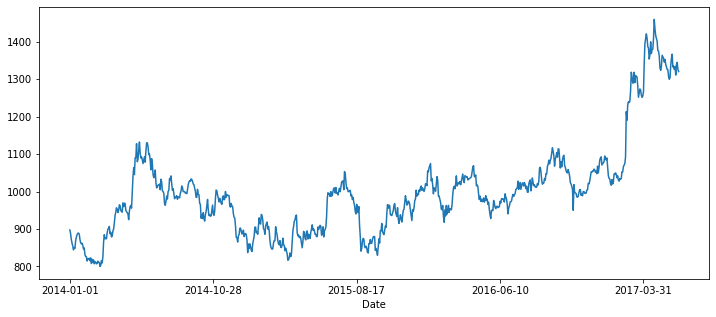

In [ ]:
df['Open'].plot(figsize=(12,5))

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 31.9 MB/s 
     |████████████████████████████████| 9.8 MB 28.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#Get best p,d,q value for ARIMA model

from pmdarima import auto_arima 
#Ignore harmless warnings
import warnings
warnings.filterwarnings("always")


#The goal is to minimize the AIC and get the best order with the lowest AIC

stepwise_fit = auto_arima(df['Open'], trace=True, suppress_warnings=True)
stepwise_fit.summary()
stepwise_fit.order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7100.877, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7099.736, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7101.442, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7101.448, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7098.581, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7103.368, Time=0.55 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.868 seconds


(0, 1, 0)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
pred=[]
for i in range(60):
  train= df.iloc[:-(60-i)]
  model=ARIMA(train['Open'],order=stepwise_fit.order)
  model= model.fit()
  y=model.predict(start=len(train)+1,end=len(train)+1,typ='levels')
  pred.append(y)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist

In [ ]:
predi=[]
for x in pred: predi.append(x.iloc[0])
predi

[1310.0,
 1308.0,
 1306.0,
 1282.2,
 1252.0,
 1263.15,
 1274.1,
 1271.1,
 1258.0,
 1251.7,
 1255.0,
 1266.0,
 1342.0,
 1395.2,
 1409.0,
 1421.3,
 1410.0,
 1387.85,
 1382.8,
 1354.0,
 1365.0,
 1399.95,
 1369.0,
 1379.0,
 1380.5,
 1409.05,
 1460.0,
 1435.0,
 1417.0,
 1409.75,
 1402.0,
 1376.9,
 1375.0,
 1361.6,
 1330.0,
 1324.0,
 1334.8,
 1364.1,
 1360.05,
 1356.4,
 1346.05,
 1353.0,
 1340.25,
 1333.0,
 1326.5,
 1325.7,
 1307.5,
 1300.0,
 1303.95,
 1337.0,
 1355.9,
 1367.0,
 1332.7000000000003,
 1335.0,
 1326.25,
 1333.95,
 1311.2,
 1340.0,
 1345.1,
 1326.55]

In [ ]:
real_stock_price= df.iloc[-60:]['Open'].values
real_stock_price

array([1308.  , 1306.  , 1282.2 , 1252.  , 1263.15, 1274.1 , 1271.1 ,
       1258.  , 1251.7 , 1255.  , 1266.  , 1342.  , 1395.2 , 1409.  ,
       1421.3 , 1410.  , 1387.85, 1382.8 , 1354.  , 1365.  , 1399.95,
       1369.  , 1379.  , 1380.5 , 1409.05, 1460.  , 1435.  , 1417.  ,
       1409.75, 1402.  , 1376.9 , 1375.  , 1361.6 , 1330.  , 1324.  ,
       1334.8 , 1364.1 , 1360.05, 1356.4 , 1346.05, 1353.  , 1340.25,
       1333.  , 1326.5 , 1325.7 , 1307.5 , 1300.  , 1303.95, 1337.  ,
       1355.9 , 1367.  , 1332.7 , 1335.  , 1326.25, 1333.95, 1311.2 ,
       1340.  , 1345.1 , 1326.55, 1320.6 ])

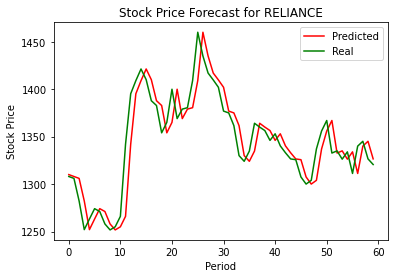

In [ ]:
plt.plot(predi, color="red", label= "Predicted")
plt.plot(real_stock_price, color="green", label= "Real")
plt.xlabel("Period")
plt.ylabel("Stock Price")
plt.title(f'Stock Price Forecast for {STOCK}')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

test=df.iloc[-60:]
import math 

from sklearn.metrics import mean_squared_error 
from math import sqrt 
 
MAE = mean_absolute_error(test['Open'], pred) #65.16489906613461
MSE = mean_squared_error(test['Open'], pred) #4877.095560904092
RMSE = math.sqrt(MSE) #69.83620522983828
R2 = r2_score(test['Open'], pred) #-3.0842872575999865
real_arima_stock_price_mean = test['Open'].mean()


print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R Squared:", R2)
print("Real Stock Price Mean:", real_arima_stock_price_mean)
print("RMSE/REAL_STOCK_PRICE_MEAN:", RMSE/real_arima_stock_price_mean) #0.0938522023072058

Mean Absolute Error: 16.04333333333332
Mean Squared Error: 461.5234166666664
Root Mean Squared Error: 21.483096067994165
R Squared: 0.8035933944062263
Real Stock Price Mean: 1344.4283333333335
RMSE/REAL_STOCK_PRICE_MEAN: 0.01597935385274844
